In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
%matplotlib inline

In [2]:
TrainDataPath = 'yds_train2018.csv'
TestDataPath = 'yds_test2018.csv'
ExpenseDataPath = 'promotional_expense.csv'
HolidayDataPath = 'holidays.xlsx'
SubDataPath = 'sample_submission.csv'


# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)
ExpenseData = pd.read_csv(ExpenseDataPath)
HolidayData = pd.read_excel(HolidayDataPath)
SubData = pd.read_csv(SubDataPath)
Promotion = pd.read_csv('promotional_expense.csv')
Promotion.rename(index=str, columns={"Product_Type": "Product_ID"}, inplace = True)
#Promotion.head()

## Train Data

In [3]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(79072, 8)


Training Dataset Columns/Features:
S_No             int64
Year             int64
Month            int64
Week             int64
Merchant_ID     object
Product_ID       int64
Country         object
Sales          float64
dtype: object


,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


## Test Data

In [4]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(105, 6)


Test Dataset Columns/Features:
S_No            int64
Year            int64
Month           int64
Product_ID      int64
Country        object
Sales         float64
dtype: object


,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


## Expense Data

In [5]:
print("Expense Dataset Shape:")
print(ExpenseData.shape)
print("\n")
print("Expense Dataset Columns/Features:")
print(ExpenseData.dtypes)
ExpenseData.head()

Expense Dataset Shape:
(435, 5)


Expense Dataset Columns/Features:
Year               int64
Month              int64
Country           object
Product_Type       int64
Expense_Price    float64
dtype: object


,Year,Month,Country,Product_Type,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


## Visulaization

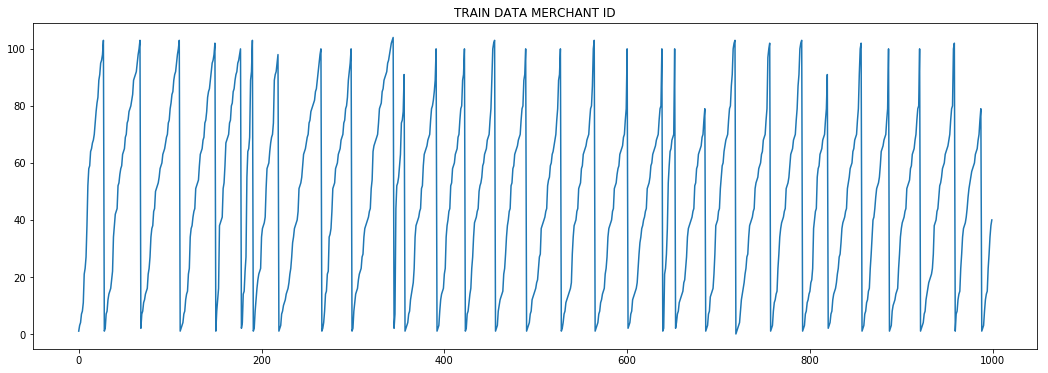

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(TrainData["Merchant_ID"][:1000].str[6:].astype(int))
plt.title('TRAIN DATA MERCHANT ID')
plt.show()

The above visualization shows how merchant id is increasing in regular pattern.

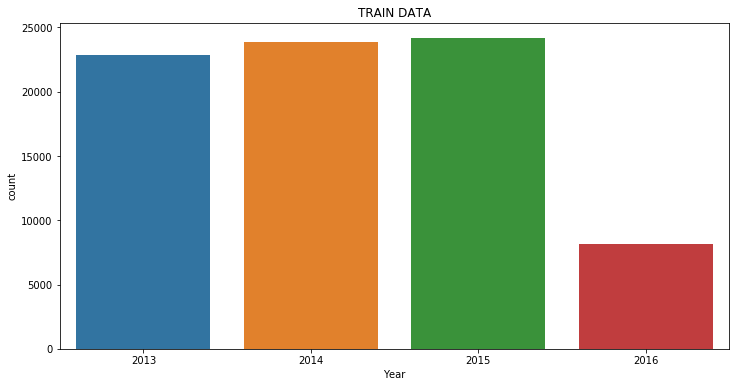

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["Year"])
plt.title('TRAIN DATA')
plt.show()

This shows the number of entries of each year we have. 

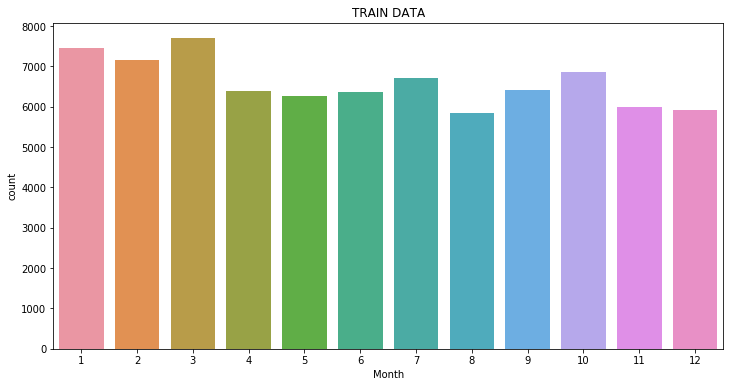

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["Month"])
plt.title('TRAIN DATA')
plt.show()

This shows the number of entries of each month we have.

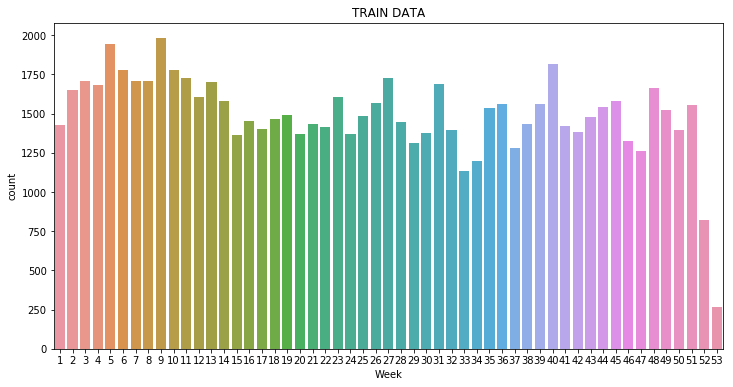

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["Week"])
plt.title('TRAIN DATA')
plt.show()

This shows the number of entries of each week we have.

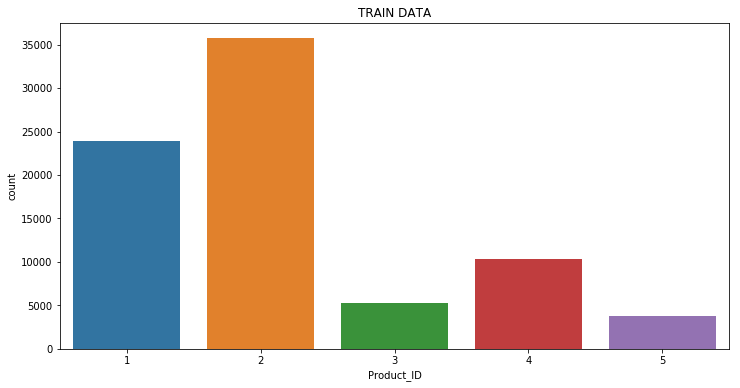

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["Product_ID"])
plt.title('TRAIN DATA')
plt.show()

This shows the number of entries of different Product Id's we have.

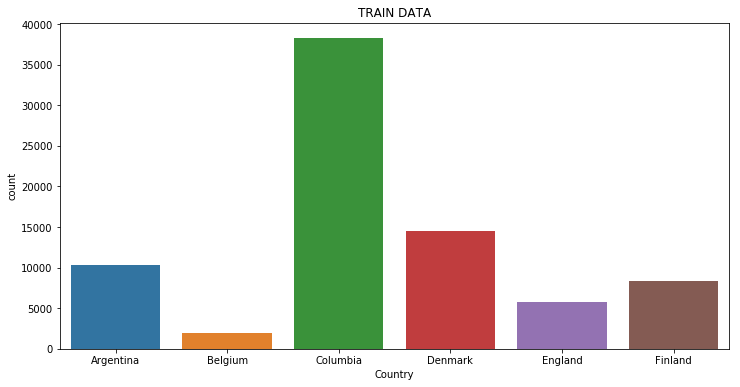

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["Country"])
plt.title('TRAIN DATA')
plt.show()

This shows the number of entries of each product we have. 

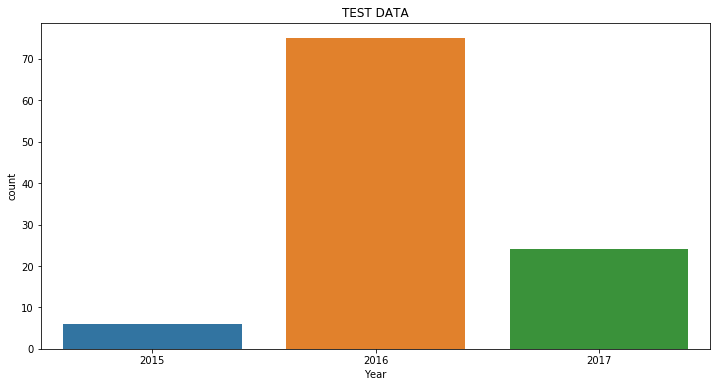

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(TestData["Year"])
plt.title('TEST DATA')
plt.show()

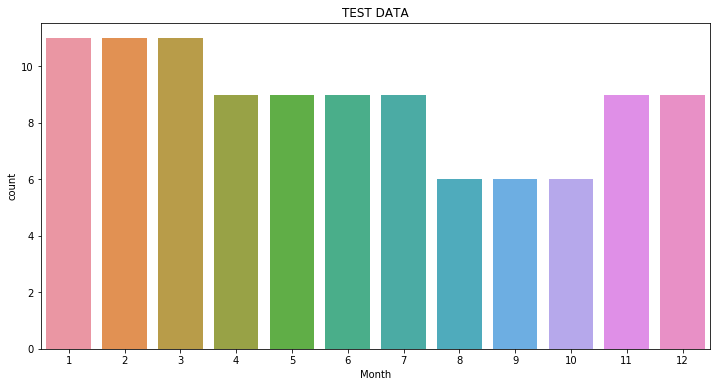

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(TestData["Month"])
plt.title('TEST DATA')
plt.show()

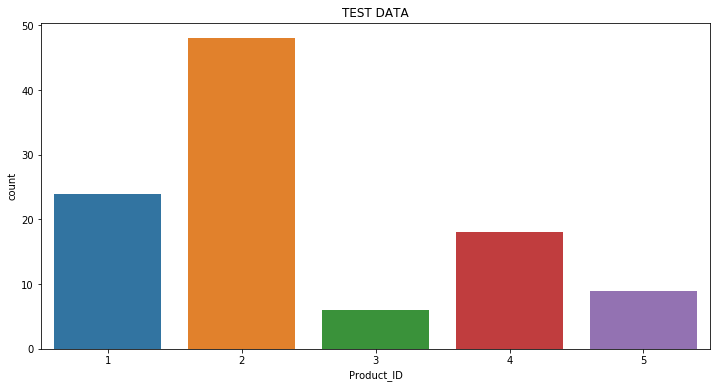

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(TestData["Product_ID"])
plt.title('TEST DATA')
plt.show()

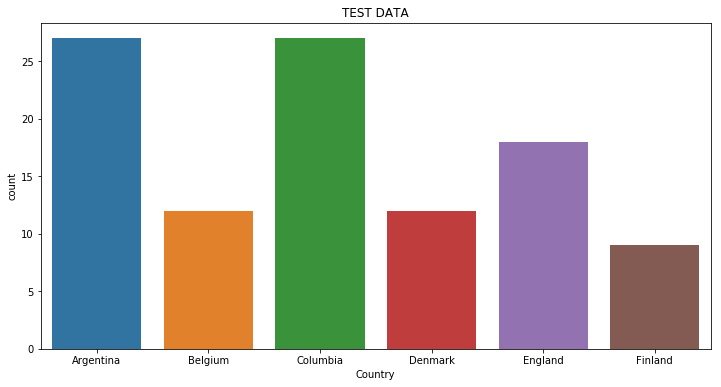

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(TestData["Country"])
plt.title('TEST DATA')
plt.show()

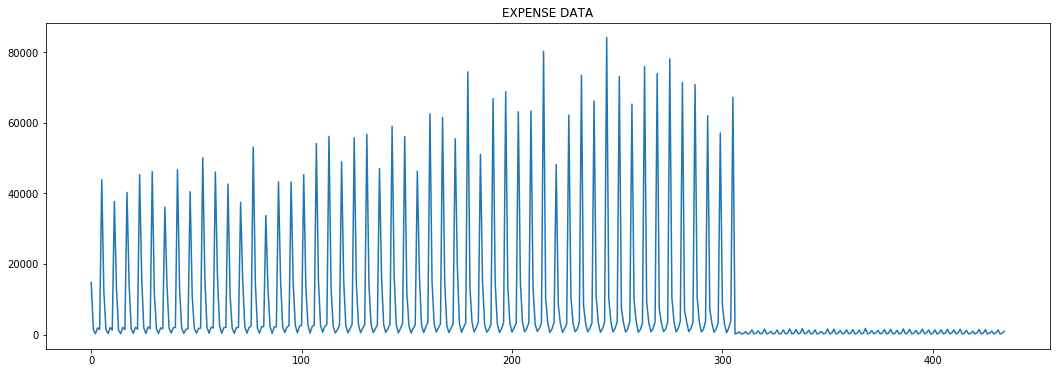

In [16]:
plt.figure(figsize=(18, 6))
plt.plot(ExpenseData["Expense_Price"])
plt.title('EXPENSE DATA')
plt.show()

In [17]:
df_Arg = TrainData[TrainData['Country'] == 'Argentina']
df_Bel = TrainData[TrainData['Country'] == 'Belgium']
df_Col = TrainData[TrainData['Country'] == 'Columbia']
df_Den = TrainData[TrainData['Country'] == 'Denmark']
df_Eng = TrainData[TrainData['Country'] == 'England']
df_Fin = TrainData[TrainData['Country'] == 'Finland']

In [18]:
Train_Arg = df_Arg.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Train_Bel = df_Bel.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Train_Col = df_Col.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Train_Den = df_Den.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Train_Fin = df_Fin.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Train_Eng = df_Eng.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')

In [19]:
Promotion_Arg = Promotion[Promotion['Country']=='Argentina']
Promotion_Bel = Promotion[Promotion['Country']== 'Belgium']
Promotion_Col = Promotion[Promotion['Country']== 'Columbia']
Promotion_Den = Promotion[Promotion['Country']== 'Denmark']
Promotion_Fin = Promotion[Promotion['Country']== 'Finland']
Promotion_Eng = Promotion[Promotion['Country']== 'England']

In [20]:
Promotion_Arg.head()

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
6,2013,2,Argentina,1,12187.566
7,2013,2,Argentina,2,1315.006
12,2013,3,Argentina,1,13076.579


In [21]:
Train_Arg.head()

,Product_ID,Year,Month,Sales
0,1,2013,1,34346025.0
1,1,2013,2,32005575.0
2,1,2013,3,32530050.0
3,1,2013,4,35588700.0
4,1,2013,5,38789100.0


In [22]:
# Train_Arg = pd.merge(Train_Arg ,Promotion_Arg, how = 'left', on = ['Year','Month','Product_ID'])
# Train_Bel = pd.merge(Train_Bel ,Promotion_Bel, how = 'left', on = ['Year','Month','Product_ID'])
# Train_Col = pd.merge(Train_Col ,Promotion_Col, how = 'left', on = ['Year','Month','Product_ID'])
# Train_Den = pd.merge(Train_Den ,Promotion_Den, how = 'left', on = ['Year','Month','Product_ID'])
# Train_Fin = pd.merge(Train_Fin ,Promotion_Fin, how = 'left', on = ['Year','Month','Product_ID'])
# Train_Eng = pd.merge(Train_Eng ,Promotion_Eng, how = 'left', on = ['Year','Month','Product_ID'])

# print(Train_Arg.isnull().sum())
# print(Train_Bel.isnull().sum())
# print(Train_Col.isnull().sum())
# print(Train_Den.isnull().sum())
# print(Train_Eng.isnull().sum())

In [23]:
df_Arg = TestData[TestData['Country'] == 'Argentina']
df_Bel = TestData[TestData['Country'] == 'Belgium']
df_Col = TestData[TestData['Country'] == 'Columbia']
df_Den = TestData[TestData['Country'] == 'Denmark']
df_Eng = TestData[TestData['Country'] == 'England']
df_Fin = TestData[TestData['Country'] == 'Finland']

In [24]:
Test_Arg = df_Arg.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Test_Bel = df_Bel.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Test_Col = df_Col.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Test_Den = df_Den.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Test_Fin = df_Fin.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')
Test_Eng = df_Eng.groupby(['Product_ID','Year','Month'])['Sales'].sum().reset_index(name = 'Sales')

In [25]:
Train_Arg.head()

,Product_ID,Year,Month,Sales
0,1,2013,1,34346025.0
1,1,2013,2,32005575.0
2,1,2013,3,32530050.0
3,1,2013,4,35588700.0
4,1,2013,5,38789100.0


In [26]:
Test_Arg.head()

,Product_ID,Year,Month,Sales
0,1,2016,4,0.0
1,1,2016,5,0.0
2,1,2016,6,0.0
3,1,2016,7,0.0
4,1,2016,8,0.0


In [27]:
Result_Arg = pd.merge(Train_Arg ,Promotion_Arg,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Bel = pd.merge(Train_Bel ,Promotion_Bel,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Col = pd.merge(Train_Col ,Promotion_Col,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Den = pd.merge(Train_Den ,Promotion_Den,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Fin = pd.merge(Train_Fin ,Promotion_Fin,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Eng = pd.merge(Train_Eng ,Promotion_Eng,  on = ['Year','Month','Product_ID'], how = 'left')

Result_Arg_Test = pd.merge(Test_Arg ,Promotion_Arg,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Bel_Test = pd.merge(Test_Bel ,Promotion_Bel,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Col_Test = pd.merge(Test_Col ,Promotion_Col,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Den_Test = pd.merge(Test_Den ,Promotion_Den,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Fin_Test = pd.merge(Test_Fin ,Promotion_Fin,  on = ['Year','Month','Product_ID'], how = 'left')
Result_Eng_Test = pd.merge(Test_Eng ,Promotion_Eng,  on = ['Year','Month','Product_ID'], how = 'left')
 

# print(Train_Arg.isnull().sum())
# print(Train_Bel.isnull().sum())
# print(Train_Col.isnull().sum())
# print(Train_Den.isnull().sum())
# print(Train_Eng.isnull().sum())

In [28]:
Train_Arg["Time"] = pd.to_datetime(Train_Arg.Year*100+Train_Arg.Month,format='%Y%m')
Train_Bel["Time"] = pd.to_datetime(Train_Bel.Year*100+Train_Bel.Month,format='%Y%m')
Train_Col["Time"] = pd.to_datetime(Train_Col.Year*100+Train_Col.Month,format='%Y%m')
Train_Den["Time"] = pd.to_datetime(Train_Den.Year*100+Train_Den.Month,format='%Y%m')
Train_Eng["Time"] = pd.to_datetime(Train_Eng.Year*100+Train_Eng.Month,format='%Y%m')
Train_Fin["Time"] = pd.to_datetime(Train_Fin.Year*100+Train_Fin.Month,format='%Y%m')

In [29]:
# Train_Arg["Time"]

In [30]:
Test_Arg["Time"] = pd.to_datetime(Test_Arg.Year*100+Test_Arg.Month,format='%Y%m')
Test_Bel["Time"] = pd.to_datetime(Test_Bel.Year*100+Test_Bel.Month,format='%Y%m')
Test_Col["Time"] = pd.to_datetime(Test_Col.Year*100+Test_Col.Month,format='%Y%m')
Test_Den["Time"] = pd.to_datetime(Test_Den.Year*100+Test_Den.Month,format='%Y%m')
Test_Eng["Time"] = pd.to_datetime(Test_Eng.Year*100+Test_Eng.Month,format='%Y%m')
Test_Fin["Time"] = pd.to_datetime(Test_Fin.Year*100+Test_Fin.Month,format='%Y%m')

In [31]:
Train_Arg.head()

,Product_ID,Year,Month,Sales,Time
0,1,2013,1,34346025.0,2013-01-01
1,1,2013,2,32005575.0,2013-02-01
2,1,2013,3,32530050.0,2013-03-01
3,1,2013,4,35588700.0,2013-04-01
4,1,2013,5,38789100.0,2013-05-01


In [32]:
Test_Arg.head()

,Product_ID,Year,Month,Sales,Time
0,1,2016,4,0.0,2016-04-01
1,1,2016,5,0.0,2016-05-01
2,1,2016,6,0.0,2016-06-01
3,1,2016,7,0.0,2016-07-01
4,1,2016,8,0.0,2016-08-01


In [33]:
#Setting Index
Train_Arg = Train_Arg.set_index('Time')
Train_Bel = Train_Bel.set_index('Time')
Train_Col = Train_Col.set_index('Time')
Train_Den = Train_Den.set_index('Time')
Train_Fin = Train_Fin.set_index('Time')
Train_Eng = Train_Eng.set_index('Time')

In [34]:

Train_Arg = Train_Arg.drop(["Year","Month"],axis=1)
Train_Bel = Train_Bel.drop(["Year","Month"],axis=1)
Train_Col = Train_Col.drop(["Year","Month"],axis=1)
Train_Den = Train_Den.drop(["Year","Month"],axis=1)
Train_Eng = Train_Eng.drop(["Year","Month"],axis=1)
Train_Fin = Train_Fin.drop(["Year","Month"],axis=1)

In [35]:
# Train_Arg.head()

In [36]:
Test_Arg = Test_Arg.set_index('Time')
Test_Bel = Test_Bel.set_index('Time')
Test_Col = Test_Col.set_index('Time')
Test_Den = Test_Den.set_index('Time')
Test_Fin = Test_Fin.set_index('Time')
Test_Eng = Test_Eng.set_index('Time')

In [37]:
Test_Arg = Test_Arg.drop(["Year","Month"],axis=1)
Test_Bel = Test_Bel.drop(["Year","Month"],axis=1)
Test_Col = Test_Col.drop(["Year","Month"],axis=1)
Test_Den = Test_Den.drop(["Year","Month"],axis=1)
Test_Eng = Test_Eng.drop(["Year","Month"],axis=1)
Test_Fin = Test_Fin.drop(["Year","Month"],axis=1)

In [38]:
Test_Arg.head()

,Product_ID,Sales
Time,,
2016-04-01,1,0.0
2016-05-01,1,0.0
2016-06-01,1,0.0
2016-07-01,1,0.0
2016-08-01,1,0.0


In [39]:
Promotion.head()

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [40]:
# Promotion_Arg["Time"] = pd.to_datetime(Promotion_Arg.Year*100+Promotion_Arg.Month,format='%Y%m')
# Promotion_Bel["Time"] = pd.to_datetime(Promotion_Bel.Year*100+Promotion_Bel.Month,format='%Y%m')
# Promotion_Col["Time"] = pd.to_datetime(Promotion_Col.Year*100+Promotion_Col.Month,format='%Y%m')
# Promotion_Den["Time"] = pd.to_datetime(Promotion_Den.Year*100+Promotion_Den.Month,format='%Y%m')
# Promotion_Eng["Time"] = pd.to_datetime(Promotion_Eng.Year*100+Promotion_Eng.Month,format='%Y%m')
# Promotion_Fin["Time"] = pd.to_datetime(Promotion_Fin.Year*100+Promotion_Fin.Month,format='%Y%m')

# Promotion_Arg = Promotion_Arg.set_index('Time')
# Promotion_Bel = Promotion_Bel.set_index('Time')
# Promotion_Col = Promotion_Col.set_index('Time')
# Promotion_Den = Promotion_Den.set_index('Time')
# Promotion_Eng = Promotion_Eng.set_index('Time')
# Promotion_Fin = Promotion_Fin.set_index('Time')

## Time Series Analysis

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(18,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

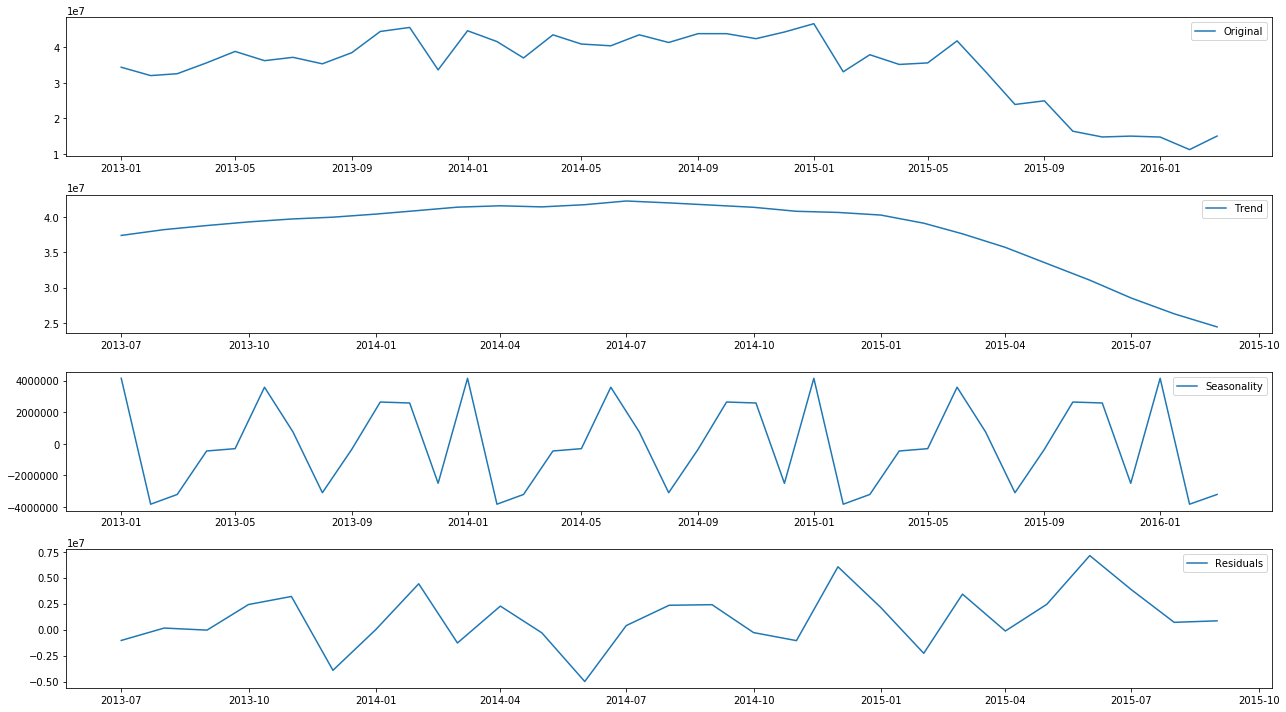

In [42]:
decomposition = seasonal_decompose(Train_Arg.query("Product_ID==1")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Arg.query("Product_ID==1")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

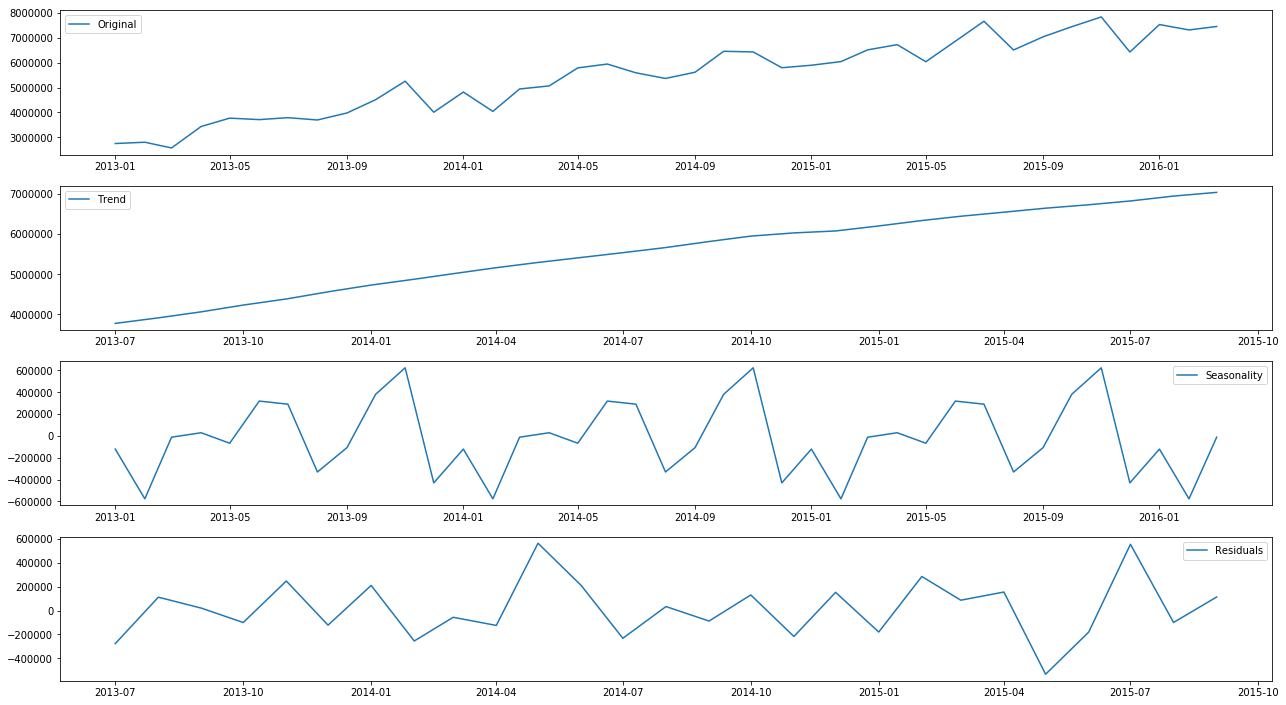

In [43]:
decomposition = seasonal_decompose(Train_Arg.query("Product_ID==2")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Arg.query("Product_ID==2")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

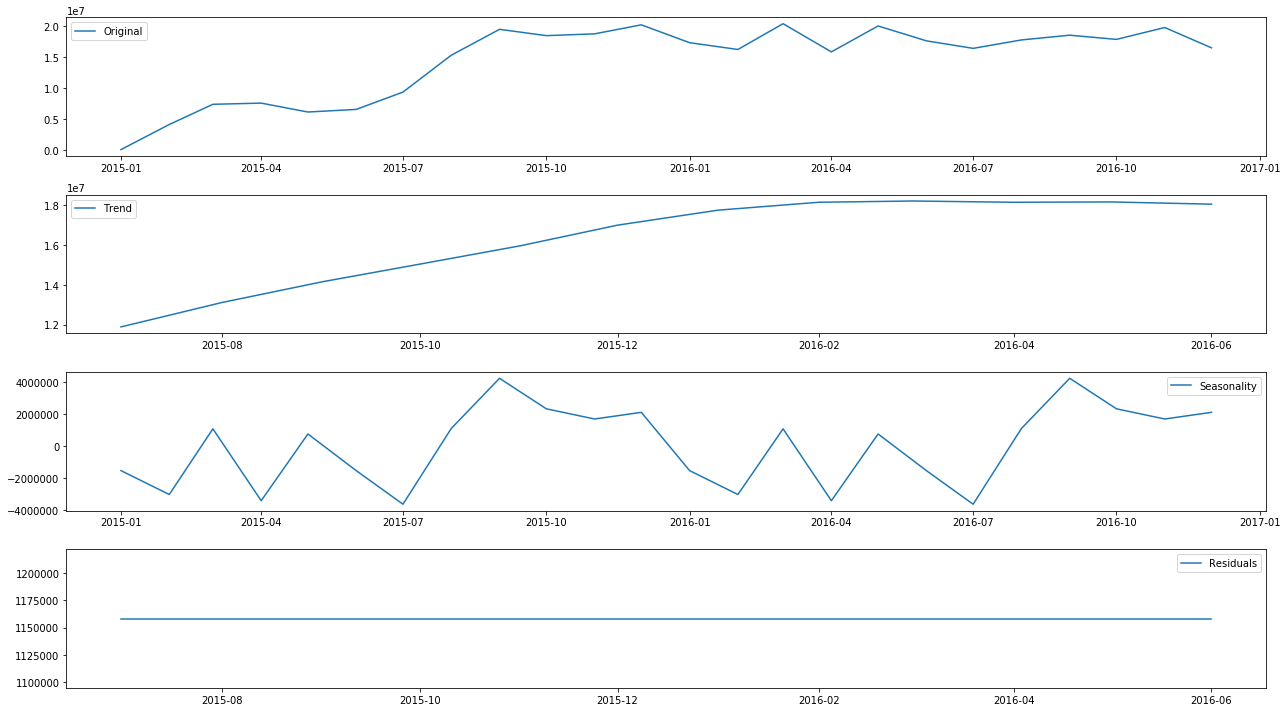

In [44]:
decomposition = seasonal_decompose(Train_Arg.query("Product_ID==3")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Arg.query("Product_ID==3")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


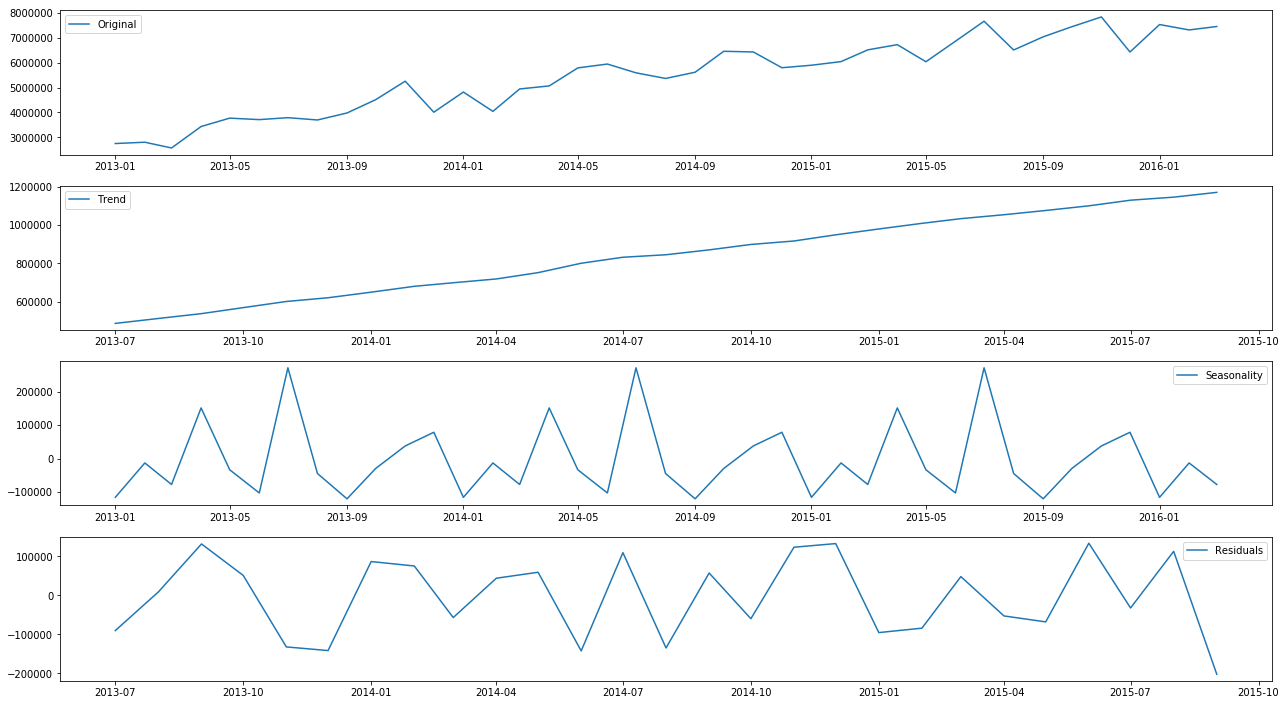

In [45]:
decomposition = seasonal_decompose(Train_Bel.query("Product_ID==2")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Arg.query("Product_ID==2")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

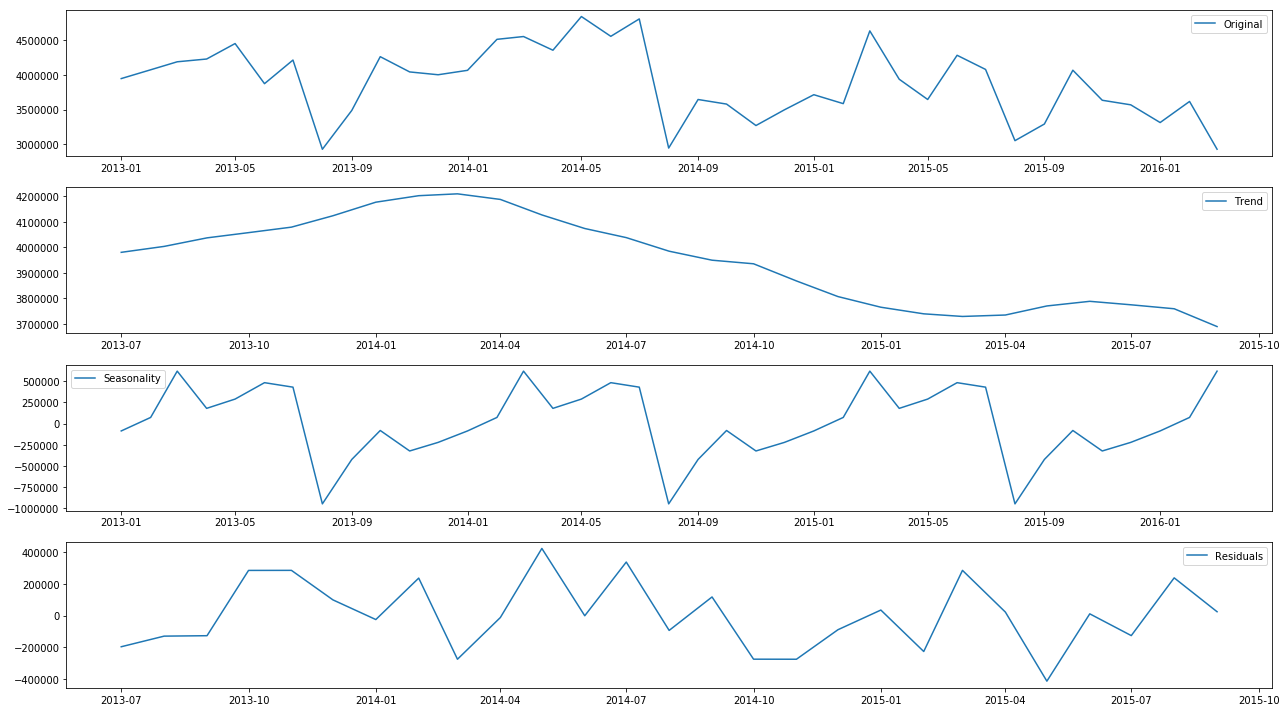

In [46]:
decomposition = seasonal_decompose(Train_Col.query("Product_ID==1")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Col.query("Product_ID==1")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

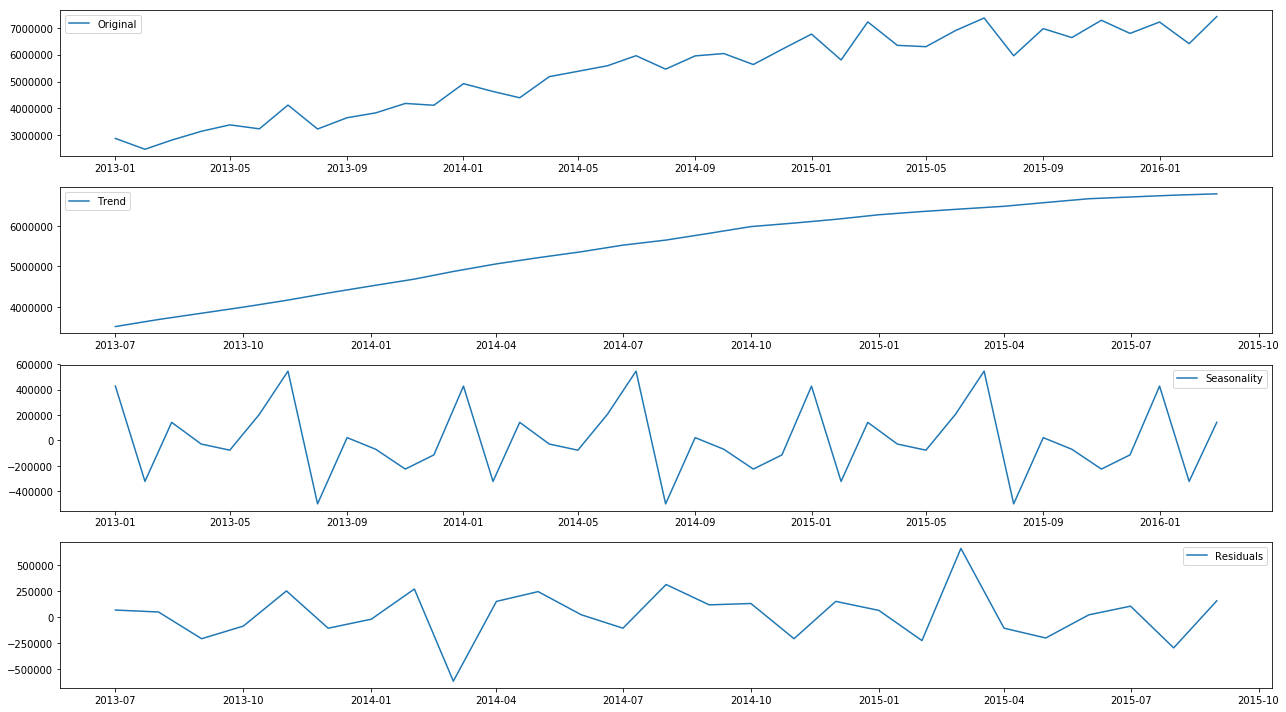

In [47]:
decomposition = seasonal_decompose(Train_Col.query("Product_ID==2")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Col.query("Product_ID==2")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

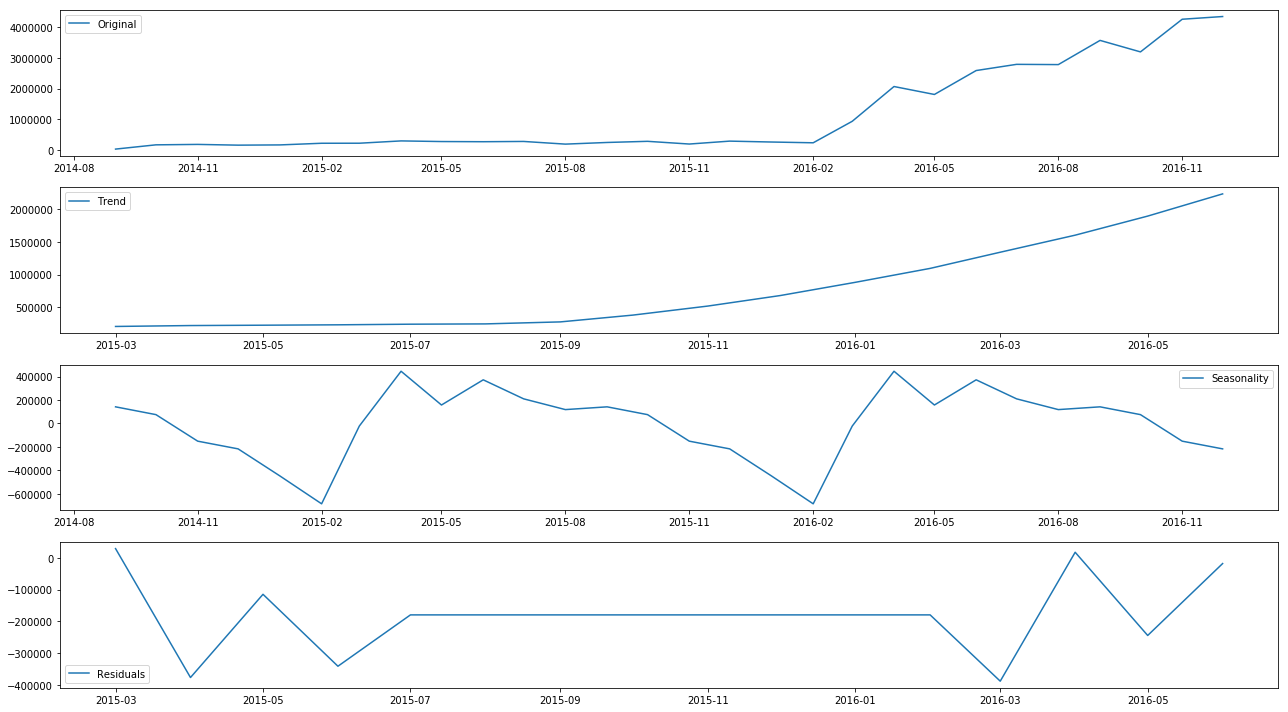

In [48]:
decomposition = seasonal_decompose(Train_Col.query("Product_ID==3")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Col.query("Product_ID==3")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
decomposition = seasonal_decompose(Train_Eng.query("Product_ID==4")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Eng.query("Product_ID==4")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

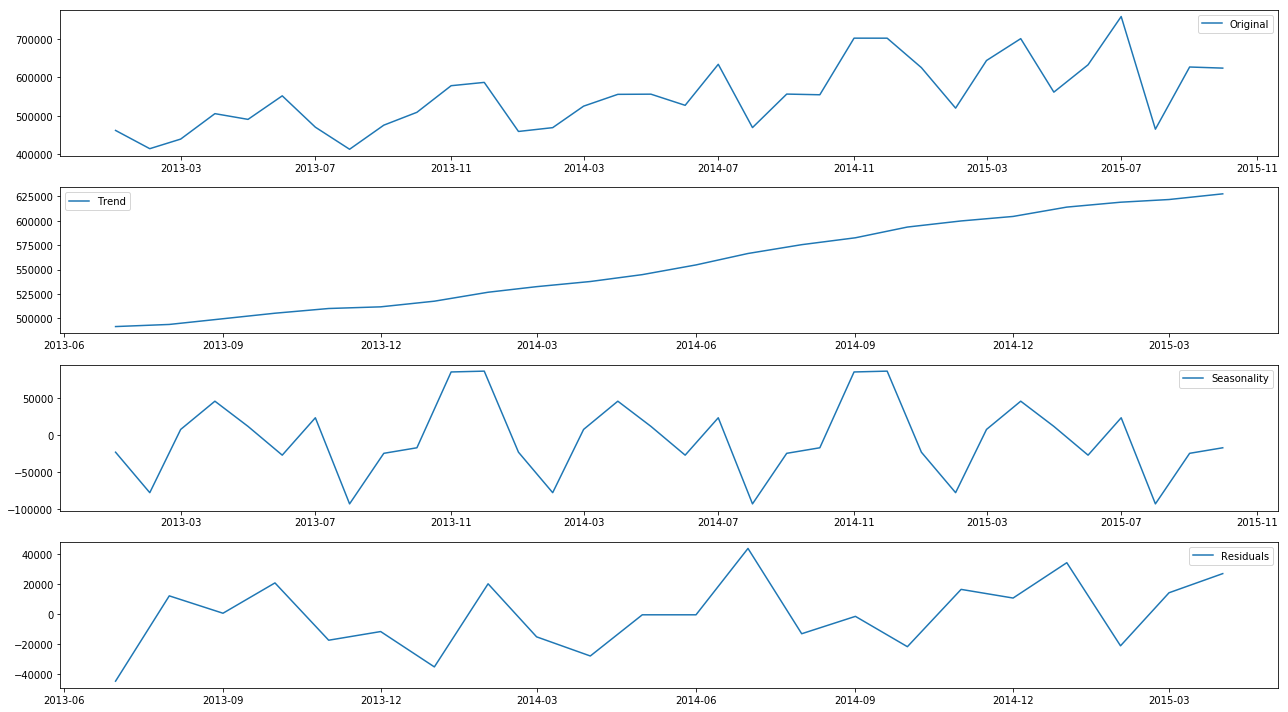

In [109]:
decomposition = seasonal_decompose(Train_Eng.query("Product_ID==5")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Eng.query("Product_ID==5")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

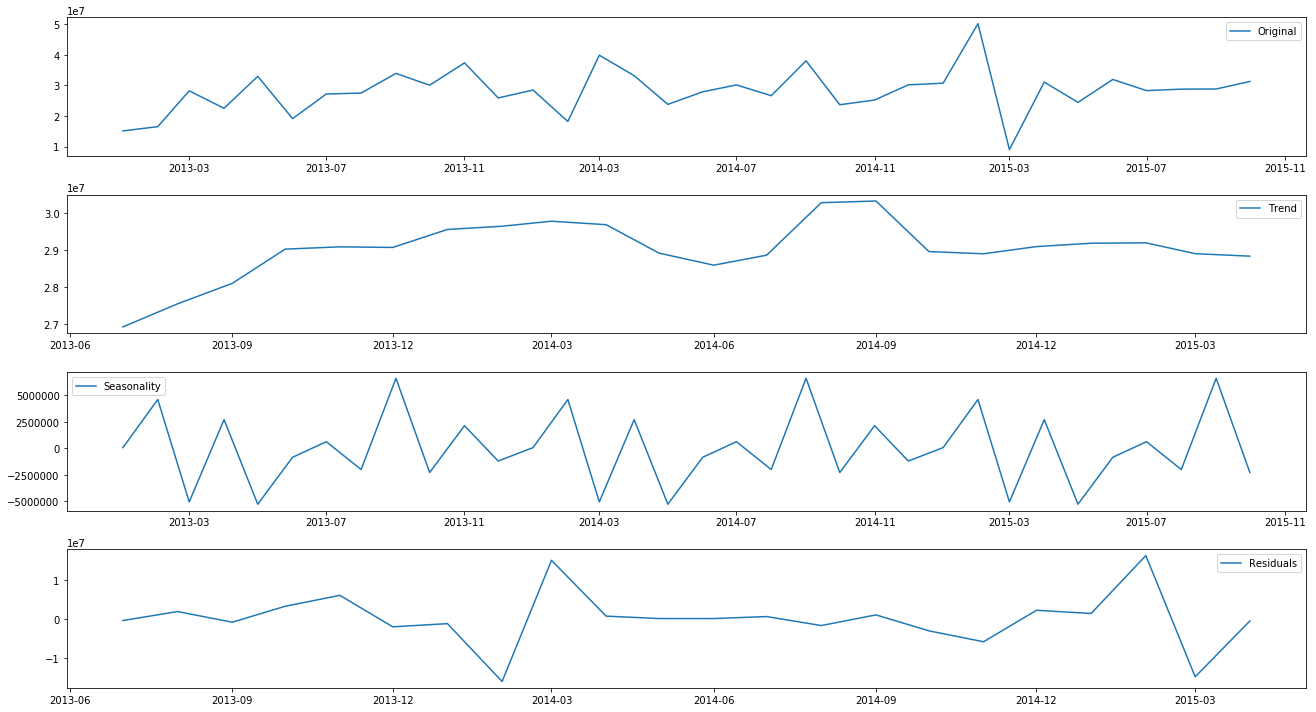

In [110]:
decomposition = seasonal_decompose(Train_Fin.query("Product_ID==4")["Sales"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(Train_Fin.query("Product_ID==4")["Sales"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Predictions 

Perdictions using **Decision Tree** Model if the Expense Price of the Product-Id and month available otherwise use **arima** for predicting further Sales data.

In [118]:
# Prediction for product id = 1 in Argentina
df_test = Result_Arg_Test[Result_Arg_Test['Product_ID']==1]
df_train = Result_Arg[Result_Arg['Product_ID']==1]
X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
list1 = []
list1 = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
list1 = list1.tolist()



df_test = Result_Arg_Test[Result_Arg_Test['Product_ID']==2]
df_train = Result_Arg[Result_Arg['Product_ID']==2]
X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

from statsmodels.tsa.arima_model import ARIMA
#ARIMA MODEL
model = ARIMA(Train_Arg.query("Product_ID==3")["Sales"], order=(5,0,1))
model_fit = model.fit(disp=0)
x = model_fit.predict(start='2017-01-01',end='2017-03-01').reset_index(drop=True)
x = x.tolist()
list1.extend(x)

# # import datetime as dt

# # df_test = Test_Arg[Test_Arg['Product_ID']==3]
# # df_train = Train_Arg[Train_Arg['Product_ID']==3]
# # X = df_train['Time'].map(dt.datetime.toordinal).reshape(-1,1)
# # y = df_train['Sales']

# # regressor = LinearRegression()
# # regressor.fit(X, y)

# # y = []
# # y = regressor.predict(df_test['Time'].map(dt.datetime.toordinal).reshape(-1,1))
# # y = y.tolist()
# # #print(y)
# # list1.extend(y)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [119]:
df_test = Result_Bel_Test[Result_Bel_Test['Product_ID']==2]
df_train = Result_Bel[Result_Bel['Product_ID']==2]

X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

In [120]:
#Columbia Product Id 1
df_test = Result_Col_Test[Result_Col_Test['Product_ID']==1]
df_train = Result_Col[Result_Col['Product_ID']==1]
X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

#Columbia Product Id 2
df_test = Result_Col_Test[Result_Col_Test['Product_ID']==2]
df_train = Result_Col[Result_Col['Product_ID']==2]
X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

In [121]:
#Columbia Product Id 3

model = ARIMA(Train_Col.query("Product_ID==3")["Sales"], order=(5,0,1))
model_fit = model.fit(disp=0)
x = model_fit.predict(start='2017-01-01',end='2017-03-01').reset_index(drop=True)
list1.extend(x)

# df_test = Test_Col[Test_Col['Product_ID']==3]
# df_train = Train_Col[Train_Col['Product_ID']==3]
# X = df_train['Time'].map(dt.datetime.toordinal).reshape(-1,1)
# y = df_train['Sales']

# regressor = LinearRegression()
# regressor.fit(X, y)

# y = []
# y = regressor.predict(df_test['Time'].map(dt.datetime.toordinal).reshape(-1,1))
# y = y.tolist()
#print(y)
# list1.extend(y)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [122]:
# Denmark Product Id 1
model = ARIMA(Train_Den.query("Product_ID==2")["Sales"], order=(5,0,0))
model_fit = model.fit(disp=0)
x = model_fit.predict(start='2016-04-01',end='2017-03-01').reset_index(drop=True)
list1.extend(x)


# df_test = Test_Den[Test_Den['Product_ID']==2]
# df_train = Train_Den[Train_Den['Product_ID']==2]
# X = df_train['Time'].map(dt.datetime.toordinal).reshape(-1,1)
# y = df_train['Sales']

# regressor = LinearRegression()
# regressor.fit(X, y)

# y = []
# y = regressor.predict(df_test['Time'].map(dt.datetime.toordinal).reshape(-1,1))
# y = y.tolist()
# #print(y)
# list1.extend(y)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [123]:
#England Product Id 5
df_test = Result_Eng_Test[Result_Eng_Test['Product_ID']==5]
df_train = Result_Eng[Result_Eng['Product_ID']==5]

X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

In [124]:
#England Product Id 4
df_test = Result_Eng_Test[Result_Eng_Test['Product_ID']==4]
df_train = Result_Eng[Result_Eng['Product_ID']==4]

X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

In [125]:
df_test = Result_Fin_Test[Result_Fin_Test['Product_ID']==4]
df_train = Result_Fin[Result_Fin['Product_ID']==4]

X = df_train['Expense_Price'].values.reshape(-1,1)
y = df_train['Sales']
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y = []
y = regressor.predict(df_test['Expense_Price'].values.reshape(-1,1))
y = y.tolist()
list1.extend(y)

In [126]:
len(list1)

105

In [127]:
df = pd.DataFrame()
df["Sales"] = list1
sub = df.copy()
sub = sub.reset_index(drop=True)
TestData["Sales"] = sub["Sales"]

In [128]:
TestData.to_csv('yds_submission2018.csv', index = False)